In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#Importing dataset from CIFAR
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split


# Load CIFAR-10 dataset.
# We are naming the test part as holdout for now so that we can later split it into validation and test data.
(x_train, y_train), (x_holdout, y_holdout) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(y_train.shape[0], "train labels")
print(x_holdout.shape[0], "test samples")
print(y_holdout.shape[0], "test labels")

x_train shape: (50000, 32, 32, 3)
50000 train samples
50000 train labels
10000 test samples
10000 test labels


In [3]:
#Holding out data for test validation, ensuring a consistent split across classes with stratify
# We are getting 50% of the holdout data (test_size=0.50), which was already 20% of the entire dataset.

x_test, x_val, y_test, y_val = train_test_split(
    x_holdout, y_holdout, test_size=0.50, stratify=y_holdout, random_state=42
)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
5000 validation samples
5000 test samples


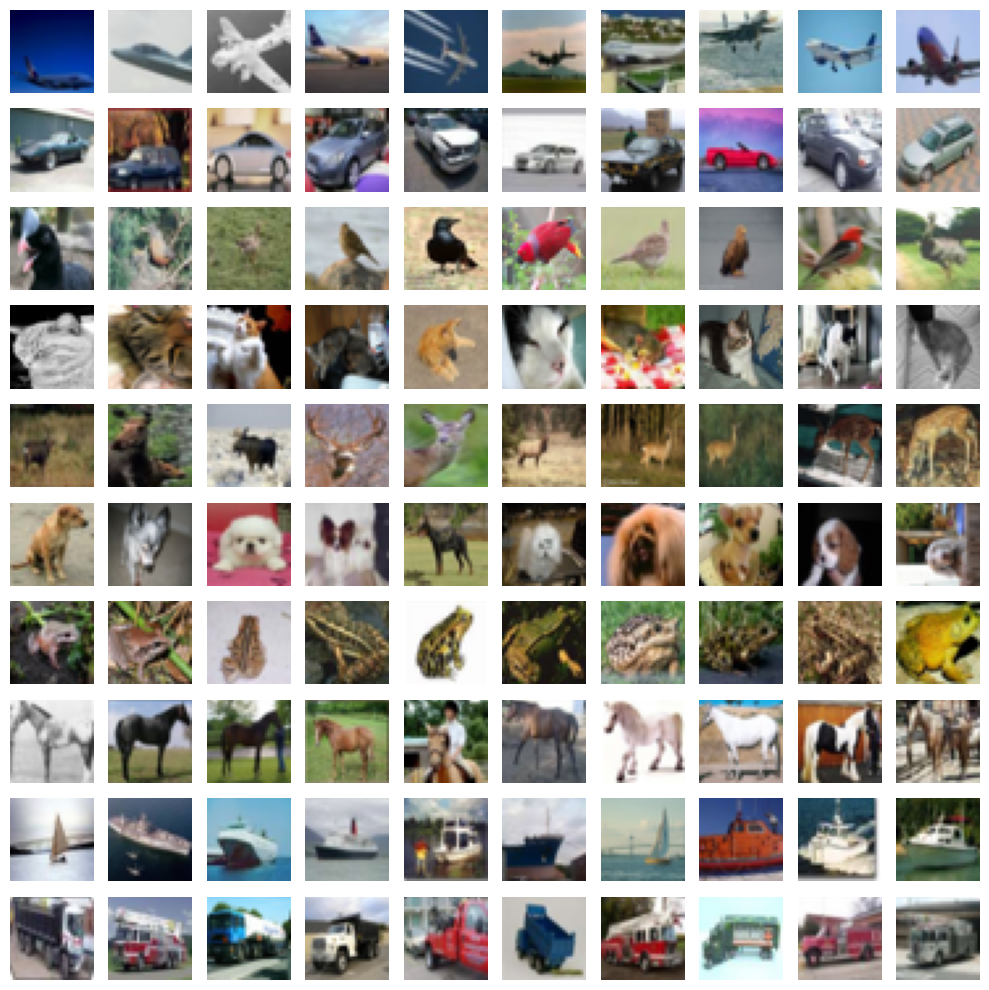

In [4]:
#Visualize: 10×10 grid, 10 random samples per class to make sure we have all classes represented
import matplotlib.pyplot as plt

class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]
y_val_f = y_val.flatten()
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for cls in range(10):
    idxs = np.where(y_val_f == cls)[0]
    sel = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(sel):
        ax = axes[cls, j]
        ax.imshow(x_val[idx])
        ax.axis("off")
plt.tight_layout()
plt.show()

In [5]:
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
# convert classes into categories
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)

In [24]:
##block of code used to clear keras sessions during development

#from keras.backend import clear_session
#clear_session()

In [7]:
"""
## Build the model
"""

model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,146 (402.91 KB)

 Trainable params: 103,146 (402.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
"""
## Train the model
"""

batch_size = 128
epochs = 15

model1.compile(
    loss="categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"])

history1 = model1.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)



Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.2182 - loss: 2.0600 - val_accuracy: 0.4396 - val_loss: 1.5350
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4038 - loss: 1.6146 - val_accuracy: 0.5074 - val_loss: 1.3659
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4764 - loss: 1.4476 - val_accuracy: 0.5626 - val_loss: 1.2446
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5236 - loss: 1.3327 - val_accuracy: 0.5874 - val_loss: 1.1536
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5484 - loss: 1.2722 - val_accuracy: 0.5868 - val_loss: 1.1440
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5773 - loss: 1.2005 - val_accuracy: 0.6348 - val_loss: 1.0236
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5981 - loss: 1.1391 - val_accuracy: 0.6358 - val_loss: 1.0305
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6157 - loss: 1.1042 - val_accuracy:

In [9]:
"""
## Evaluate the trained model
"""

score_train1 = model1.evaluate(x_train, y_train_cat, verbose=0)
print("Test loss:", score_train1[0])
print("Test accuracy:", score_train1[1])

Test loss: 0.7458710670471191
Test accuracy: 0.7341799736022949


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


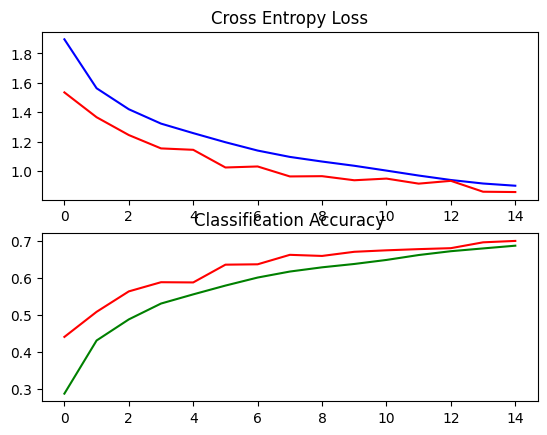

In [10]:
print(history1.history.keys())
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='red', label='val')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='green', label='train')
plt.plot(history1.history['val_accuracy'], color='red', label='val')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


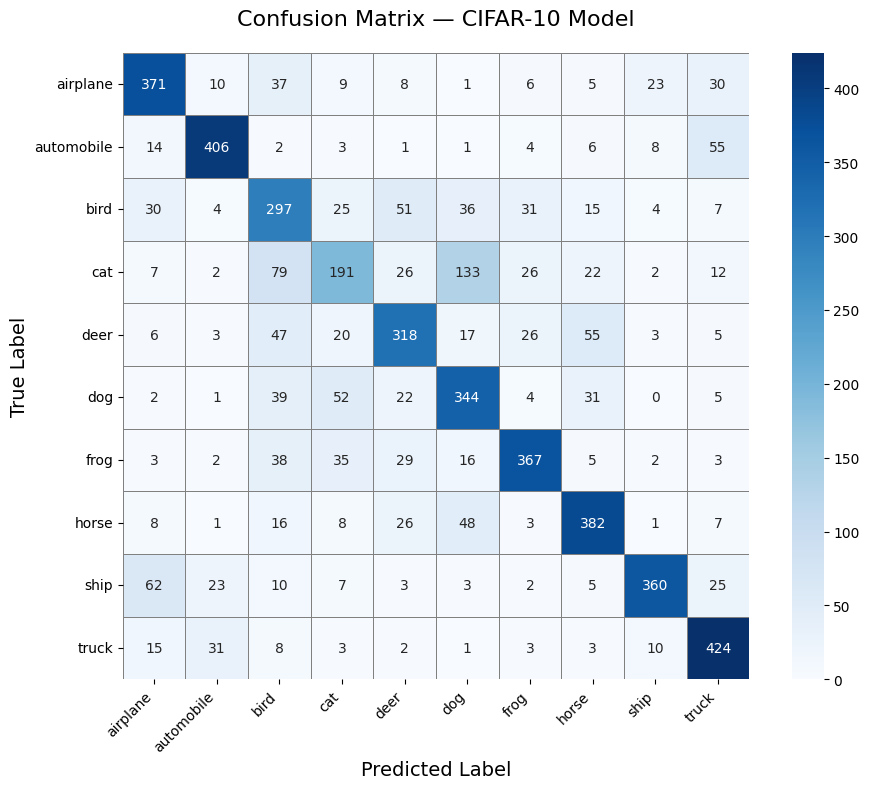

In [14]:
# Predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

predictions = model1.predict(x_val)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_val_cat, axis=1)

# Compute confusion matrix
cm = confusion_matrix(gt, predictions)

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
      xticklabels=class_names,
      yticklabels=class_names,
      cbar=True, square=True,
      linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix — CIFAR-10 Model', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
len(predictions)

5000

In [12]:
#Evaluate model

score_val1 = model1.evaluate(x_val, y_val_cat, verbose=0)
print("Test loss:", score_val1[0])
print("Test accuracy:", score_val1[1])

Test loss: 0.884558379650116
Test accuracy: 0.6919999718666077


In [ ]:
"""------------ MODEL ITERATIONS ------------ """

In [ ]:
""" ------------ MODEL 2 ------------ """

-------MODEL 2--------

**Iteration strategy:**
* Add **Batch Normalization** to **model design** after each Conv2D layer to stabilize and speed up training.

*Batch normalization is a technique in deep learning that normalizes the inputs to each layer in a neural network by re-centering them around zero and re-scaling them, which stabilizes and accelerates training. It works by calculating the mean and variance for each mini-batch and then adjusting the layer's output to have a mean of 0 and a standard deviation of 1. This helps prevent "internal covariate shift" — the problem of a layer's input distribution changing during training — allowing the network to learn faster and with higher learning rates.*


In [25]:
"""
Iteration strategy:
"""

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,914 (405.91 KB)

 Trainable params: 103,530 (404.41 KB)

 Non-trainable params: 384 (1.50 KB)

In [19]:
##block of code used to clear keras sessions during development

from keras.backend import clear_session
clear_session()

In [26]:
"""
## Train the model
Iteration strategy: keep
"""

batch_size = 128
epochs = 15

model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history2 = model2.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2805 - loss: 2.1247 - val_accuracy: 0.2046 - val_loss: 2.2644
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4801 - loss: 1.4650 - val_accuracy: 0.5330 - val_loss: 1.2905
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5525 - loss: 1.2672 - val_accuracy: 0.6000 - val_loss: 1.0955
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5959 - loss: 1.1564 - val_accuracy: 0.5946 - val_loss: 1.1445
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6280 - loss: 1.0674 - val_accuracy: 0.6642 - val_loss: 0.9500
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6466 - loss: 0.9909 - val_accuracy: 0.6576 - val_loss: 0.9886
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6741 - loss: 0.9372 - val_accuracy: 0.6568 - val_loss: 0.9905
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6909 - loss: 0.8893 - val_accur

In [23]:
"""
## Evaluate the trained model, make predictions and evaluate predictions
"""
score_train2 = model2.evaluate(x_train, y_train_cat, verbose=0)
print("Train loss:", score_train2[0])
print("Train accuracy:", score_train2[1])


predictions2 = model2.predict(x_val)
predictions2 = np.argmax(predictions2, axis=1)


score_val2 = model2.evaluate(x_val, y_val_cat, verbose=0)
print("Test loss:", score_val2[0])
print("Test accuracy:", score_val2[1])


Test loss: 0.5440992712974548
Test accuracy: 0.8118799924850464
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test loss: 0.8089423775672913
Test accuracy: 0.7364000082015991


In [ ]:
""" ------------ MODEL 3 ------------ """

-------MODEL 3--------

**Iteration strategy:**
* Add **more epochs** to **model fit**, including an early stop, which means that the model will stop at the best epoch, saves best weights, and avoids over/under-training.


In [29]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [24]:
##block of code used to clear keras sessions during development

from keras.backend import clear_session
clear_session()

In [30]:
"""
## Train the model
"""
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

batch_size = 128
epochs = 50
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6)
]

model3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history3 = model3.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.2955 - loss: 2.0757 - val_accuracy: 0.1742 - val_loss: 2.2108
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4933 - loss: 1.4264 - val_accuracy: 0.4592 - val_loss: 1.4203
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5597 - loss: 1.2465 - val_accuracy: 0.6034 - val_loss: 1.1338
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6057 - loss: 1.1175 - val_accuracy: 0.6482 - val_loss: 1.0095
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6321 - loss: 1.0486 - val_accuracy: 0.5956 - val_loss: 1.1338
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6545 - loss: 0.9795 - val_accuracy: 0.6810 - val_loss: 0.8980
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6772 - loss: 0.9192 - val_accuracy: 0.6798 - val_loss: 0.8954
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6907 - loss: 0.8828 - val_accu

In [33]:
"""
## Evaluate the trained model, make predictions and evaluate predictions
"""
score_train3 = model3.evaluate(x_train, y_train_cat, verbose=0)
print("Train loss:", score_train3[0])
print("Train accuracy:", score_train3[1])


predictions3 = model3.predict(x_val)
predictions3 = np.argmax(predictions3, axis=1)


score_val3 = model3.evaluate(x_val, y_val_cat, verbose=0)
print("Test loss:", score_val3[0])
print("Test accuracy:", score_val3[1])


Train loss: 0.3682616651058197
Train accuracy: 0.8858000040054321
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test loss: 1.1719671487808228
Test accuracy: 0.7242000102996826




----- MODEL 4 -----
(this is model 2 with tweaks in fitting and compilation)


In [35]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,976 (1.19 MB)

 Trainable params: 103,530 (404.41 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 207,062 (808.84 KB)

In [37]:

import tensorflow as tf



opt = tf.keras.optimizers.Adam(learning_rate=1e-3)  # you can change this later

model2.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"])

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6)
]

history4 = model2.fit(
    x_train, y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=100,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7698 - loss: 0.6606 - val_accuracy: 0.7304 - val_loss: 0.8350 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7820 - loss: 0.6239 - val_accuracy: 0.7318 - val_loss: 0.8097 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7885 - loss: 0.6070 - val_accuracy: 0.7154 - val_loss: 0.8608 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7907 - loss: 0.5948 - val_accuracy: 0.7422 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7972 - loss: 0.5751 - val_accuracy: 0.7182 - val_loss: 0.8907 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8048 - loss: 0.5549 - val_accuracy: 0.7452 - val_loss: 0.7846 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8078 - lo

In [38]:
"""
## Evaluate the trained model, make predictions and evaluate predictions
"""
score_train4 = model2.evaluate(x_train, y_train_cat, verbose=0)
print("Train loss:", score_train4[0])
print("Train accuracy:", score_train4[1])


predictions4 = model2.predict(x_val)
predictions4 = np.argmax(predictions4, axis=1)


score_val4 = model2.evaluate(x_val, y_val_cat, verbose=0)
print("Test loss:", score_val4[0])
print("Test accuracy:", score_val4[1])

Train loss: 0.2611176669597626
Train accuracy: 0.9120799899101257
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test loss: 0.7803959846496582
Test accuracy: 0.7634000182151794


-----MODEL 7-----

```
# This is formatted as code
```



In [35]:
from keras.backend import clear_session
clear_session()

In [37]:
"""
Iteration strategy: changing dropout rate
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization, Dropout

#we tried Data Augmentation but it didn't improve accuracy and increased running times a lot

#data_augmentation = tf.keras.Sequential([
#    tf.keras.layers.RandomFlip('horizontal'),
#    tf.keras.layers.RandomRotation(0.2),
#])

model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #data_augmentation,  # <--- first layer (only active during training)
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3), #adding dropout rate
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3), #adding dropout rate
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3), #adding dropout rate
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,290 (426.91 KB)

 Trainable params: 108,778 (424.91 KB)

 Non-trainable params: 512 (2.00 KB)

In [38]:

import tensorflow as tf

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler


opt = tf.keras.optimizers.Adam()  # you can change this later

model5.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"])

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6),
    LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))
]

history5 = model5.fit(
    x_train, y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.3277 - loss: 2.0114 - val_accuracy: 0.5362 - val_loss: 1.2792 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5643 - loss: 1.2294 - val_accuracy: 0.6232 - val_loss: 1.0543 - learning_rate: 8.9125e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6389 - loss: 1.0139 - val_accuracy: 0.6916 - val_loss: 0.8746 - learning_rate: 7.9433e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6829 - loss: 0.8901 - val_accuracy: 0.7142 - val_loss: 0.7950 - learning_rate: 7.0795e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7129 - loss: 0.8168 - val_accuracy: 0.7174 - val_loss: 0.8127 - learning_rate: 6.3096e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7318 - loss: 0.7606 - val_accuracy: 0.7486 - val_loss: 0.7131 - learning_rate: 5.6234e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.

In [39]:
"""
## Evaluate the trained model, make predictions and evaluate predictions
"""
score_train5 = model5.evaluate(x_train, y_train_cat, verbose=0)
print("Train loss:", score_train5[0])
print("Train accuracy:", score_train5[1])


predictions5 = model5.predict(x_val)
predictions5 = np.argmax(predictions5, axis=1)


score_val5 = model5.evaluate(x_val, y_val_cat, verbose=0)
print("Validation loss:", score_val5[0])
print("Validation accuracy:", score_val5[1])

#predictions and score with real data
predictions_real = model5.predict(x_test)
predictions_real = np.argmax(predictions_real, axis=1)


score_test5 = model5.evaluate(x_test, y_test_cat, verbose=0)
print("Test loss:", score_test5[0])
print("Test accuracy:", score_test5[1])



Train loss: 0.3396387994289398
Train accuracy: 0.8859599828720093
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Validation loss: 0.522926926612854
Validation accuracy: 0.8185999989509583
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test loss: 0.5426046252250671
Test accuracy: 0.8144000172615051


**Notes so far (until model 5)**
NEEDS EDIT
What improved the model:


* Adding batch normalization (which normalizes inputs to each layer by re-centering them around zero and re-scaling them, which stabilizes and accelerates training).
* Adding more epochs (100 instead of 15), with an early stopper.
* Decreasing the dropout (0.5 to 0.3)

So far, the winner is model 5 (which is model 2 with hyperparameters from iteration 4)


**Next things to try**
* Data augmentation (doing)
* add more dropouts - Add Dropout after Conv blocks, not just at the end
* change learning rate

Optionals
* Transfer Learning

* deploying